**Using Machine Learning model to predict whether a person has type-2 diabetes or not based on input 8 features**

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
### filling out missing values
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [4]:
df[df['Glucose'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [5]:
df[df['BloodPressure'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


In [6]:
df[df['SkinThickness'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.3,0.258,52,1
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
762,9,89,62,0,0,22.5,0.142,33,0


In [7]:
df['SkinThickness'].value_counts()

,count
SkinThickness,
0,227
32,31
30,27
27,23
23,22
18,20
33,20
28,20
31,19


In [8]:
df[df['Insulin'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
df[df.BMI == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


In [10]:
df['BMI'].fillna(df['BMI'].mean(), inplace = True)

<ipython-input-10-af84c3c91cd3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BMI'].fillna(df['BMI'].mean(), inplace = True)


In [11]:
df['SkinThickness'].fillna(df['SkinThickness'].mean(), inplace = True)

<ipython-input-11-a88431808108>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SkinThickness'].fillna(df['SkinThickness'].mean(), inplace = True)


In [12]:
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)

<ipython-input-12-7f0f99ddb78f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)


In [13]:
df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)

<ipython-input-13-af81b4c27021>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)


**Train Test Splitting**

In [14]:
from sklearn.model_selection import train_test_split , GridSearchCV, RandomizedSearchCV
X_train, X_test, y_train, y_test = train_test_split(df.drop('Outcome', axis = 1), df['Outcome'], test_size = 0.2, random_state = 42)

In [15]:
## standard Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [17]:
models = {
    'SVC' : SVC(),
    'RandomForest' : RandomForestClassifier(),
    'LogisticRegression' : LogisticRegression(),
    'XGBoost' : XGBClassifier()
}

In [18]:
model_hyperparams = {
    'SVC': {
        'kernel': ['linear', 'rbf', 'poly'],
        'C': [0.1, 1, 10]
        },
    'RandomForest': {
      'n_estimators': np.arange(100, 1000, 100),
    'max_depth': np.arange(10, 32),
    'min_samples_split': np.arange(2, 20),
    'min_samples_leaf': np.arange(1, 20),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
    },
    'LogisticRegression': {
        'C': [0.1, 1, 10],
        'penalty': ['l1', 'l2']
    },
    'XGBoost': {
        'n_estimators': [100, 500],
        'learning_rate': [0.01, 0.1, 0.2]
    }

}

**Randomized SearchCV to find best fit of hyperparameters for each**

In [19]:
def evaluate_models(models, model_hyperparams, X_train, X_test, y_train, y_test):
    best_models = {}
    for model_name, model in models.items():
      params = model_hyperparams[model_name]
      grid = RandomizedSearchCV(model, params, cv = 5)
      grid.fit(X_train, y_train)
      best_models[model_name] = grid.best_estimator_
      print(f"Best parameters for {model_name}: {grid.best_params_}")
      print(f"Best score for {model_name}: {grid.best_score_}")
    return best_models

In [20]:
best_models = evaluate_models(models, model_hyperparams, X_train_scaled, X_test_scaled, y_train, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for SVC: {'kernel': 'rbf', 'C': 1}
Best score for SVC: 0.7687458349993335
Best parameters for RandomForest: {'n_estimators': np.int64(100), 'min_samples_split': np.int64(13), 'min_samples_leaf': np.int64(2), 'max_features': 'sqrt', 'max_depth': np.int64(13), 'bootstrap': True}
Best score for RandomForest: 0.783406637345062
Best parameters for LogisticRegression: {'penalty': 'l2', 'C': 10}
Best score for LogisticRegression: 0.7655071304811408


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wr

Best parameters for XGBoost: {'n_estimators': 100, 'learning_rate': 0.2}
Best score for XGBoost: 0.7589230974276956


In [21]:
from sklearn.metrics import classification_report
model = RandomForestClassifier(max_depth=np.int64(26), max_features='log2',
                        min_samples_leaf=np.int64(4),
                        min_samples_split=np.int64(2),
                        n_estimators=np.int64(700))

In [22]:
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83        99
           1       0.68      0.71      0.70        55

    accuracy                           0.78       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.78      0.78      0.78       154



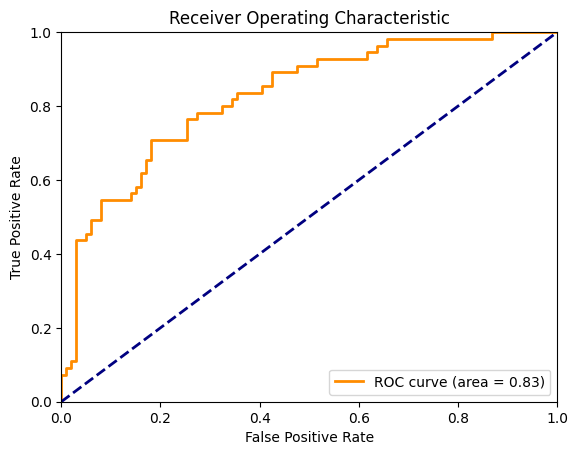

In [27]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
